In [1]:
import mesa

def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B


class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
        self.happy=1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
    
    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1
            self.wealth-=1

    def step(self):
        self.move()
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        # print("Agent #" + str(self.unique_id) + ", Wealth:"+str(self.wealth)+",Location:"+str(self.pos))
        if self.wealth > 0:
            self.give_money()


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = mesa.space.MultiGrid(width, height, True)
        self.schedule = mesa.time.RandomActivation(self)
        self.running = True
        
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini}, agent_reporters={"Wealth": "wealth"}
        )

    def step(self):
        """Advance the model by one step."""
        self.datacollector.collect(self)
        self.schedule.step()

In [35]:
empty_model=MoneyModel(10)
empty_model.step()


TypeError: MoneyModel.__init__() missing 2 required positional arguments: 'width' and 'height'

In [29]:
model = MoneyModel(10)
for i in range(10):
    model.step()

Hi, I am agent 3, and my wealth is:0
Hi, I am agent 0, and my wealth is:0
Hi, I am agent 8, and my wealth is:0
Hi, I am agent 4, and my wealth is:0
Hi, I am agent 5, and my wealth is:0
Hi, I am agent 6, and my wealth is:0
Hi, I am agent 9, and my wealth is:3
Hi, I am agent 1, and my wealth is:0
Hi, I am agent 7, and my wealth is:1
Hi, I am agent 2, and my wealth is:2
Hi, I am agent 8, and my wealth is:0
Hi, I am agent 1, and my wealth is:0
Hi, I am agent 9, and my wealth is:2
Hi, I am agent 2, and my wealth is:2
Hi, I am agent 0, and my wealth is:0
Hi, I am agent 4, and my wealth is:1
Hi, I am agent 3, and my wealth is:1
Hi, I am agent 5, and my wealth is:0
Hi, I am agent 7, and my wealth is:2
Hi, I am agent 7, and my wealth is:1
Hi, I am agent 2, and my wealth is:1
Hi, I am agent 4, and my wealth is:0
Hi, I am agent 8, and my wealth is:0
Hi, I am agent 9, and my wealth is:3
Hi, I am agent 1, and my wealth is:1
Hi, I am agent 0, and my wealth is:0
Hi, I am agent 3, and my wealth is:0
H

(array([5., 0., 3., 0., 0., 0., 0., 1., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

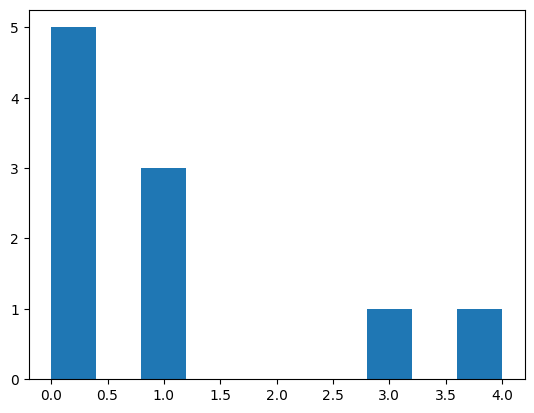

In [30]:
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

Hi, I am agent 2, and my wealth is:0
Hi, I am agent 3, and my wealth is:0
Hi, I am agent 9, and my wealth is:0
Hi, I am agent 7, and my wealth is:0
Hi, I am agent 4, and my wealth is:1
Hi, I am agent 6, and my wealth is:0
Hi, I am agent 1, and my wealth is:1
Hi, I am agent 0, and my wealth is:1
Hi, I am agent 8, and my wealth is:2
Hi, I am agent 5, and my wealth is:1
Hi, I am agent 3, and my wealth is:1
Hi, I am agent 5, and my wealth is:0
Hi, I am agent 4, and my wealth is:1
Hi, I am agent 2, and my wealth is:1
Hi, I am agent 1, and my wealth is:1
Hi, I am agent 0, and my wealth is:1
Hi, I am agent 8, and my wealth is:2
Hi, I am agent 2, and my wealth is:0
Hi, I am agent 4, and my wealth is:1
Hi, I am agent 8, and my wealth is:1
Hi, I am agent 0, and my wealth is:0
Hi, I am agent 1, and my wealth is:2
Hi, I am agent 9, and my wealth is:0
Hi, I am agent 7, and my wealth is:1
Hi, I am agent 3, and my wealth is:1
Hi, I am agent 6, and my wealth is:0
Hi, I am agent 2, and my wealth is:0
H

(array([423., 287., 195.,  68.,  19.,   6.,   2.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

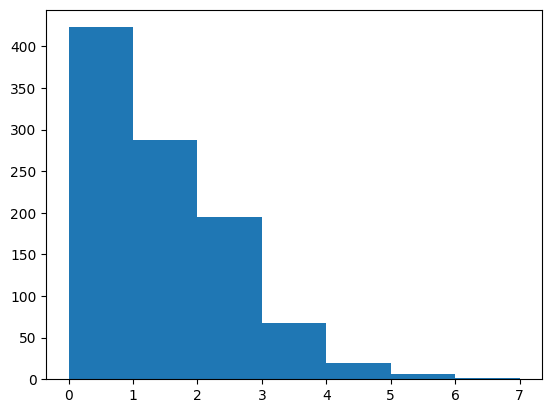

In [31]:
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for j in range(100):
    # Run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

plt.hist(all_wealth, bins=range(max(all_wealth) + 1))

In [43]:
model = MoneyModel(50, 10, 10)
for i in range(20):
    model.step()

Agent #5, Wealth:1,Location:(8, 4)
Agent #41, Wealth:1,Location:(7, 0)
Agent #45, Wealth:1,Location:(2, 5)
Agent #23, Wealth:1,Location:(3, 0)
Agent #30, Wealth:1,Location:(5, 1)
Agent #34, Wealth:1,Location:(0, 4)
Agent #0, Wealth:1,Location:(7, 9)
Agent #1, Wealth:1,Location:(6, 4)
Agent #38, Wealth:1,Location:(3, 8)
Agent #18, Wealth:1,Location:(7, 8)
Agent #40, Wealth:1,Location:(8, 8)
Agent #48, Wealth:1,Location:(6, 8)
Agent #19, Wealth:1,Location:(4, 9)
Agent #10, Wealth:1,Location:(2, 7)
Agent #39, Wealth:1,Location:(0, 8)
Agent #31, Wealth:1,Location:(7, 3)
Agent #37, Wealth:1,Location:(1, 6)
Agent #4, Wealth:1,Location:(7, 1)
Agent #24, Wealth:1,Location:(3, 7)
Agent #20, Wealth:1,Location:(1, 9)
Agent #17, Wealth:1,Location:(1, 1)
Agent #27, Wealth:1,Location:(9, 5)
Agent #44, Wealth:1,Location:(9, 2)
Agent #22, Wealth:1,Location:(0, 9)
Agent #2, Wealth:1,Location:(9, 0)
Agent #28, Wealth:2,Location:(5, 0)
Agent #29, Wealth:1,Location:(6, 0)
Agent #21, Wealth:1,Location:(2, 

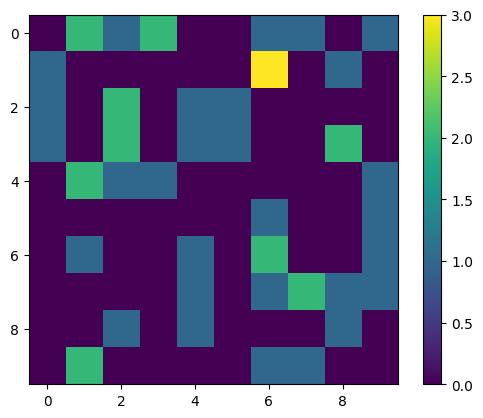

In [44]:
import numpy as np

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation="nearest")
plt.colorbar()

<AxesSubplot: >

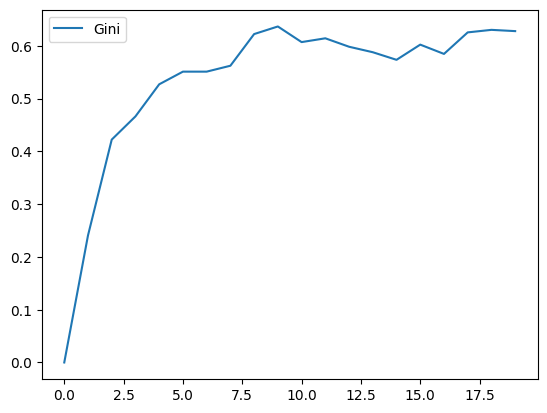

In [45]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

In [49]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1
...              ...
19   45            0
     46            0
     47            0
     48            0
     49            1

[1000 rows x 1 columns]

<AxesSubplot: >

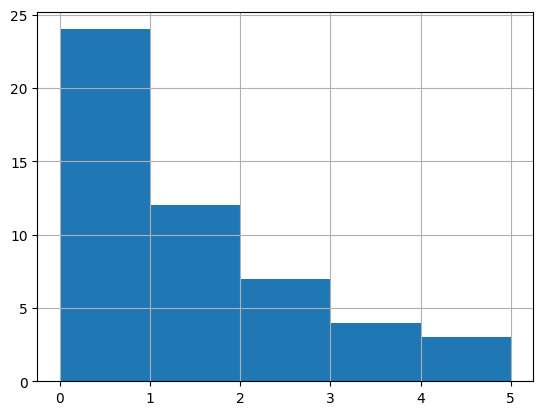

In [59]:
end_wealth = agent_wealth.xs(19, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max() + 1))

<AxesSubplot: xlabel='Step'>

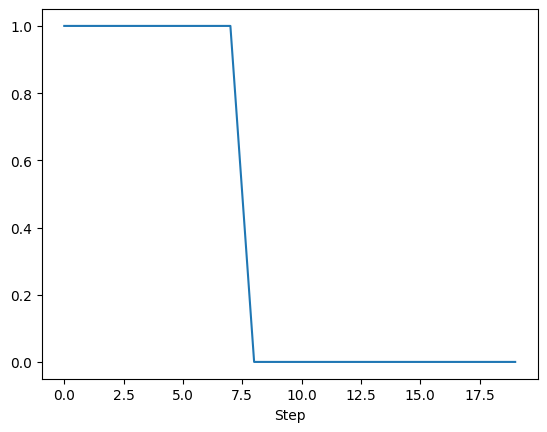

In [60]:
one_agent_wealth = agent_wealth.xs(14, level="AgentID")
one_agent_wealth.Wealth.plot()

In [61]:
# save the model data (stored in the pandas gini object) to CSV
gini.to_csv("model_data.csv")

# save the agent data (stored in the pandas agent_wealth object) to CSV
agent_wealth.to_csv("agent_data.csv")

In [65]:
params = {"width": 10, "height": 10, "N": range(10, 500, 10)}

results = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=5,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

100%|██████████| 245/245 [00:31<00:00,  7.68it/s]


In [66]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df.keys())

Index(['RunId', 'iteration', 'Step', 'width', 'height', 'N', 'Gini', 'AgentID',
       'Wealth'],
      dtype='object')


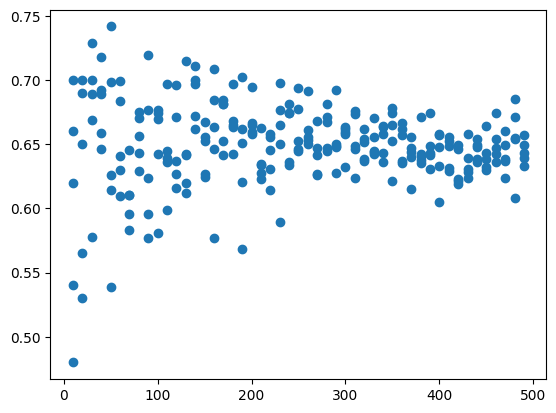

In [67]:
results_filtered = results_df[(results_df.AgentID == 0) & (results_df.Step == 100)]
N_values = results_filtered.N.values
gini_values = results_filtered.Gini.values
plt.scatter(N_values, gini_values)

In [71]:
# First, we filter the results
one_episode_wealth = results_df[(results_df.N == 10) & (results_df.iteration == 2)]
# Then, print the columns of interest of the filtered data frame
print(
    one_episode_wealth.to_string(
        index=False, columns=["Step", "AgentID", "Wealth"], max_rows=25
    )
)
# For a prettier display we can also convert the data frame to html, uncomment to test in a Jupyter Notebook
# from IPython.display import display, HTML
# display(HTML(one_episode_wealth.to_html(index=False, columns=['Step', 'AgentID', 'Wealth'], max_rows=25)))

 Step  AgentID  Wealth
    0        0       1
    0        1       1
    0        2       1
    0        3       1
    0        4       1
    0        5       1
    0        6       1
    0        7       1
    0        8       1
    0        9       1
    1        0       1
    1        1       1
  ...      ...     ...
   99        8       2
   99        9       2
  100        0       0
  100        1       0
  100        2       0
  100        3       0
  100        4       1
  100        5       2
  100        6       1
  100        7       2
  100        8       2
  100        9       2


In [72]:
results_one_episode = results_df[
    (results_df.N == 10) & (results_df.iteration == 1) & (results_df.AgentID == 0)
]
print(results_one_episode.to_string(index=False, columns=["Step", "Gini"], max_rows=25))

 Step  Gini
    0  0.00
    1  0.00
    2  0.32
    3  0.32
    4  0.32
    5  0.32
    6  0.42
    7  0.42
    8  0.48
    9  0.58
   10  0.58
   11  0.58
  ...   ...
   89  0.56
   90  0.62
   91  0.54
   92  0.54
   93  0.62
   94  0.62
   95  0.62
   96  0.62
   97  0.62
   98  0.62
   99  0.62
  100  0.62
